<center>МІНІСТЕРСТВО ОСВІТИ І НАУКИ УКРАЇНИ
<center>НАЦІОНАЛЬНИЙ ТЕХНІЧНИЙ УНІВЕРСИТЕТ УКРАЇНИ
<center>"КИЇВСЬКИЙ ПОЛІТЕХНІЧНИЙ ІНСТИТУТ імені Ігоря Сікорського"
<center>Кафедра біомедичної інженерії

<cener>Компʼютерний практикум №7

<center>з дисципліни "Обробка та аналіз біомедичних даних"
<center>на тему "Дисперсійний аналіз"
<center>14 варіант


<right>виконала:
<br>
<right>студентка групи БС-12
<br>
<right>Сипко В.І
<center>Київ-2023

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np

In [54]:
dataset = pd.read_csv('Expanded_data_with_more_features.csv')

In [55]:
dataset.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [56]:
dataset = dataset[['PracticeSport', 'WritingScore']].dropna()
min_lenght = int(dataset.groupby('PracticeSport').count().min())

In [58]:
data = pd.DataFrame(columns = dataset['PracticeSport'].unique())
data['never'] = tuple(dataset.loc[lambda dataset: dataset['PracticeSport'] == 'never', 'WritingScore'][0:min_lenght])
data['regularly'] = tuple(dataset.loc[lambda dataset: dataset['PracticeSport'] == 'regularly', 'WritingScore'][0:min_lenght])
data['sometimes'] = tuple(dataset.loc[lambda dataset: dataset['PracticeSport'] == 'sometimes', 'WritingScore'][0:min_lenght])
data

,regularly,sometimes,never
0,74,88,42
1,79,91,89
2,50,75,58
3,74,39,51
4,76,68,71
...,...,...,...
3999,71,74,78
4000,63,85,63
4001,52,75,82
4002,64,67,99


In [59]:
def stat_count(df):
    column_names = df.columns
    current_index = 0

    while current_index < len(column_names):
        i = column_names[current_index]
        mean = sum(df[i]) / len(df[i])
        diff2 = [(x - mean) ** 2 for x in df[i]]
        mean_diff = sum(diff2) / len(diff2)
        std = mean_diff ** 0.5
        current_index += 1
        yield mean, std

stats = list(stat_count(data))

statistics_df = pd.DataFrame({'regularly': [stats[0][0], stats[0][1]], 'sometimes': [stats[1][0], stats[1][1]], 'never': [stats[2][0], stats[2][1]]})
new_index = ['mean', 'std']
statistics_df = statistics_df.rename(index=dict(zip(statistics_df.index, new_index)))
statistics_df

,regularly,sometimes,never
mean,69.696304,68.130619,66.522727
std,15.562968,15.385479,15.326361


<Axes: xlabel='PracticeSport', ylabel='WritingScore'>

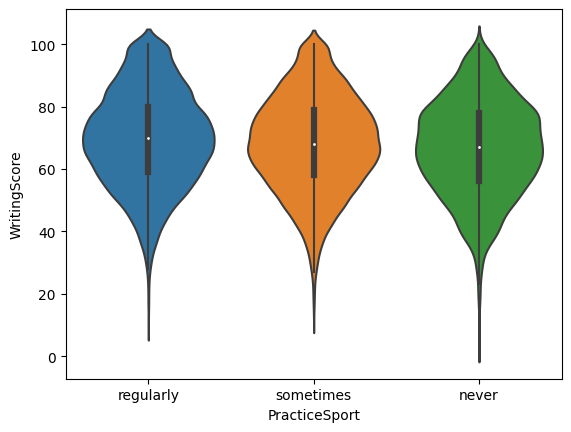

In [60]:
sns.violinplot(data=dataset, x = 'PracticeSport', y = 'WritingScore')

<Axes: xlabel='PracticeSport', ylabel='WritingScore'>

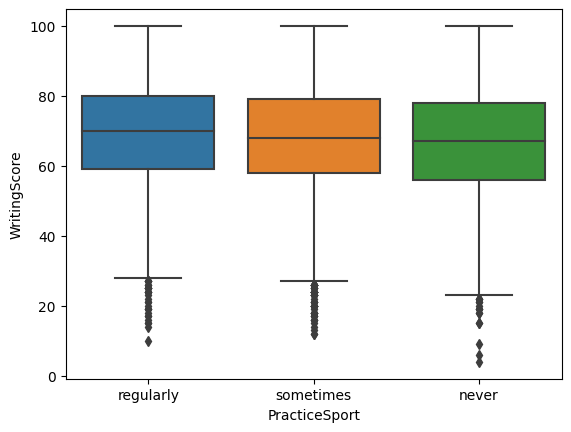

In [61]:
sns.boxplot(data=dataset, x = 'PracticeSport', y = 'WritingScore')

In [62]:
critical_values_df = pd.read_excel("critical_values.xlsx").dropna()
critical_values_df

,Unnamed: 0,f1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,f2,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,15.00,20,30.0,>40
1,1,161.45,199.50,215.71,224.58,230.16,233.99,236.77,238.88,240.54,241.88,245.95,248,250.0,254
2,2,18.51,19.00,19.16,19.25,19.30,19.33,19.35,19.37,19.38,19.40,19.43,19.5,19.5,19.4
3,3,10.13,9.55,9.28,9.12,9.01,8.94,8.89,8.85,8.81,8.79,8.70,8.7,8.6,8.5
4,4,7.71,6.94,6.59,6.39,6.26,6.16,6.09,6.04,6.00,5.96,5.86,5.8,5.8,5.6
5,5,6.61,5.79,5.41,5.19,5.05,4.95,4.88,4.82,4.77,4.74,4.62,4.6,4.5,4.4
6,6,5.99,5.14,4.76,4.53,4.39,4.28,4.21,4.15,4.10,4.06,3.94,3.9,3.8,3.7
7,7,5.59,4.74,4.35,4.12,3.97,3.87,3.79,3.73,3.68,3.64,3.51,3.4,3.4,3.2
8,8,5.32,4.46,4.07,3.84,3.69,3.58,3.50,3.44,3.39,3.35,3.22,3.2,3.1,3
9,9,5.12,4.26,3.86,3.63,3.48,3.37,3.29,3.23,3.18,3.14,3.01,2.9,2.9,2.7


In [68]:
def variance_analysis(df):
  T2 = sum(df.sum()**2)
  c = len(df.columns)
  n = len(df)
  N = sum(len(df[i]) for i in df)
  N2 = N**2
  x_2 = (sum(df.sum()))**2
  x2 = sum(sum(x**2 for x in df[i]) for i in df.columns)
  
  SS_fact = T2/n - x_2/N
  print(f"\nВнутрішньогрупова дисперсія: {round(SS_fact, 2)}")

  SS_zag = x2 - x_2/N
  print(f"\nЗагальногрупова дисперсія: {round(SS_zag, 2)}")

  SS_vyp = SS_zag - SS_fact
  print(f"\nВипадкова (залишкова) величина SS_вип: {round(SS_vyp, 2)}")

  d_fact = c - 1
  d_zag = N - 1
  d_vyp = d_zag - d_fact
  print(f"\nКількість ступенів свободи: d_факт - {d_fact}, d_заг - {d_zag}, d_вип - {d_vyp}")

  MS_fact = SS_fact/d_fact
  MS_vyp = SS_vyp/d_vyp
  print(f"\nЧастка кожної з SS та відповідного числа ступенів свободи: MS_факт = {round(MS_fact, 2)}, MS_вип = {round(MS_vyp, 2)}")

  F_emp = MS_fact/MS_vyp
  print(f"\nЗначення F_emp = {round(F_emp, 2)}")

  for f1 in range(1, len(critical_values_df)-2):
      if critical_values_df['Unnamed: 0'].iloc[f1] == d_fact:
          for f2 in range(1, len(critical_values_df.columns)-2):
              if critical_values_df.iloc[0, f2] == d_vyp:
                  F_critical = critical_values_df.iloc[f1, f2]
              elif d_vyp in range(int(critical_values_df.iloc[0, f2]), int(critical_values_df.iloc[0, f2 + 1])):
                  F_critical = critical_values_df.iloc[f1, f2+1]
              elif d_vyp >= 40:
                  F_critical = critical_values_df.iloc[f1, critical_values_df.columns.get_loc('Unnamed: 14')]
      elif d_fact in range(critical_values_df['Unnamed: 0'].iloc[f1], critical_values_df['Unnamed: 0'].iloc[f1+1]):
          for f2 in range(1, len(critical_values_df.columns) - 2):
              if critical_values_df.iloc[0, f2] == d_vyp:
                  F_critical = critical_values_df.iloc[f1+1, f2]
              elif d_vyp in range(int(critical_values_df.iloc[0, f2]), int(critical_values_df.iloc[0, f2 + 1])):
                  F_critical = critical_values_df.iloc[f1+1, f2+1]
              elif d_vyp >= 40:
                  F_critical = critical_values_df.iloc[f1+1, critical_values_df.columns.get_loc('Unnamed: 14')]
      elif d_fact >= 130:
          for f2 in range(1, len(critical_values_df.columns) - 2):
              if critical_values_df.iloc[0, f2] == d_vyp:
                  F_critical = critical_values_df.iloc[31, f2]
              elif d_vyp in range(int(critical_values_df.iloc[0, f2]), int(critical_values_df.iloc[0, f2 + 1])):
                  F_critical = critical_values_df.iloc[31, f2+1]
              elif d_vyp >= 40:
                  F_critical = critical_values_df.iloc[31, critical_values_df.columns.get_loc('Unnamed: 14')]
  print(f"\nКритичне значення: {F_critical}")
  if F_emp < F_critical: 
    print(f"\nЗначення критерія Фішера ({round(F_emp, 2)}) менше, ніж критичне значення ({round(F_critical, 2)}). Тому можемо прийняти нульову гіпотезу про рівність середніх.")
  else:
    print(f"\nЗначення критерія Фішера ({round(F_emp, 2)}) більше, ніж критичне значення ({round(F_critical, 2)}). Тому нульова гіпотеза про рівність середніх відхиляється.")


In [69]:
variance_analysis(data)


Внутрішньогрупова дисперсія: 20164.51

Загальногрупова дисперсія: 2878284.83

Випадкова (залишкова) величина SS_вип: 2858120.32

Кількість ступенів свободи: d_факт - 2, d_заг - 12011, d_вип - 12009

Частка кожної з SS та відповідного числа ступенів свободи: MS_факт = 10082.25, MS_вип = 238.0

Значення F_emp = 42.36

Критичне значення: 19.4

Значення критерія Фішера (42.36) більше, ніж критичне значення (19.4). Тому нульова гіпотеза про рівність середніх відхиляється.


Висновок: За результатами дослідження була перевірена рівність середніх результатів письмового тесту трьох груп людей: люди з першої групи регулярно займаються спортом, з другої - інколи, з третьої - ніколи. Було сформовано дві гіпотези: 
H0: μ_1  = μ_2 = ... =  μ_n (середні незалежних груп рівні);
H1: μ_1  ≠ μ_2 ≠ ... ≠ μ_n (середні незалежних груп відмінні). 
У кожній групі було проведено 4004 дослідження. Тест Фішера показав результат - значення 42.36, що є більше ніж критичне значення. Тому нульову гіпотезу про рівність середніх відхилено.